In [5]:
!pip install -q scanpy anndata igraph leidenalg

In [6]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import igraph
import leidenalg
import scipy
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
adata = sc.read_h5ad('/content/drive/MyDrive/anndata.h5ad')

In [8]:
def BasicScanpyPreprocessing(adata, n_top_genes = 2000, n_neighbors=10, n_pcs = 40, random_state = 20):
  sc.pp.normalize_total(adata, target_sum = 1e4)
  sc.pp.log1p(adata)
  sc.pp.highly_variable_genes(adata, n_top_genes = n_top_genes, flavor = 'seurat')
  #sc.pp.scale(adata, max_value=10)
  sc.tl.pca(adata, svd_solver = 'arpack')
  sc.pp.neighbors(adata, n_neighbors = n_neighbors, n_pcs = n_pcs, random_state = random_state)
  sc.tl.umap(adata, random_state = random_state)
  sc.tl.tsne(adata, random_state = random_state)
  sc.tl.leiden(adata, random_state = random_state)
  return adata

In [9]:
adata = BasicScanpyPreprocessing(adata, n_top_genes = 2000, n_neighbors = 10, n_pcs = 40, random_state = 20)

/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
<ipython-input-8-0b290b09c639>:10: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state = random_state)


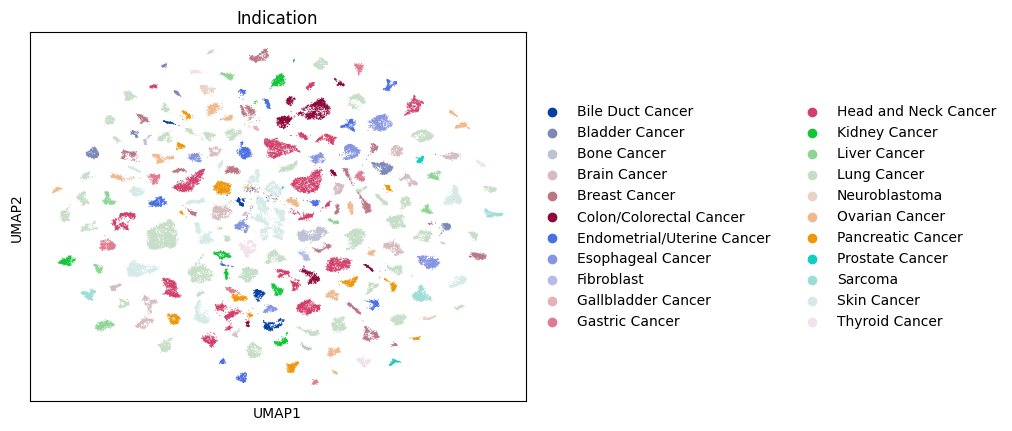

In [10]:
sc.pl.umap(adata, color = ['Indication'])

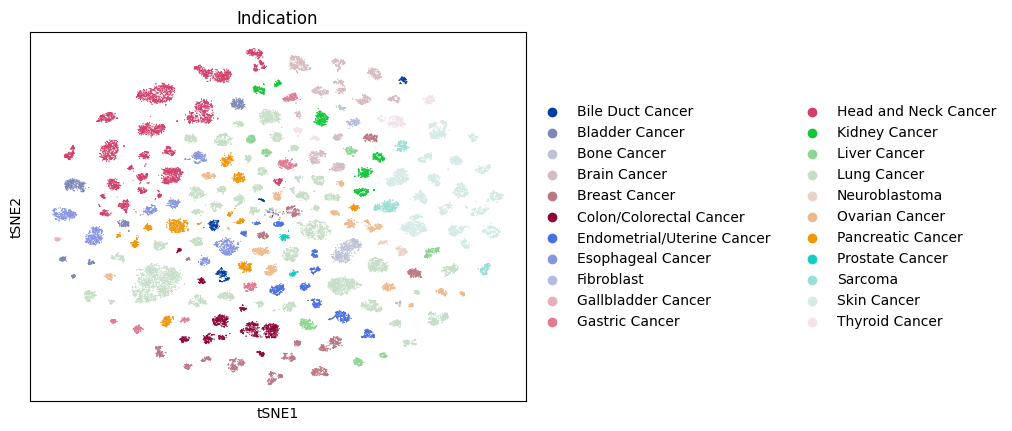

In [11]:
sc.pl.tsne(adata, color = ['Indication'])

In [12]:
adata.layers['counts'] = adata.X.copy()
adata.layers['log2_counts'] = scipy.sparse.csr_matrix(np.log2(adata.layers['counts'].toarray()+1))

In [13]:
def VisualiseData(gene, indication = None):
  if indication is None:
    df = sc.get.obs_df(adata, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
    df['Indication'] = adata.obs['Indication']
    sns.boxplot(data = df, x = 'Indication', y = gene, showfliers = False)
    sns.stripplot(data = df, x = 'Indication', y = gene, color = 'black', size = 0.5, jitter = True)
    plt.xticks(rotation = 90)
  else:
    adata_indication = adata[adata.obs.Indication==indication].copy()
    df = sc.get.obs_df(adata_indication, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
    df['CellLine'] = adata_indication.obs['CellLine']
    sns.boxplot(data = df, x = 'CellLine', y = gene, showfliers = False)
    sns.stripplot(data = df, x = 'CellLine', y = gene, color = 'black', size = 1, jitter = True)
    plt.xticks(rotation = 90)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


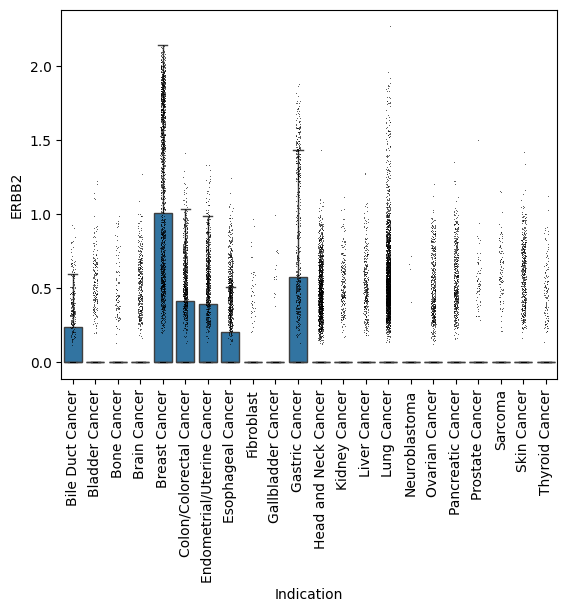

In [14]:
VisualiseData('ERBB2')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


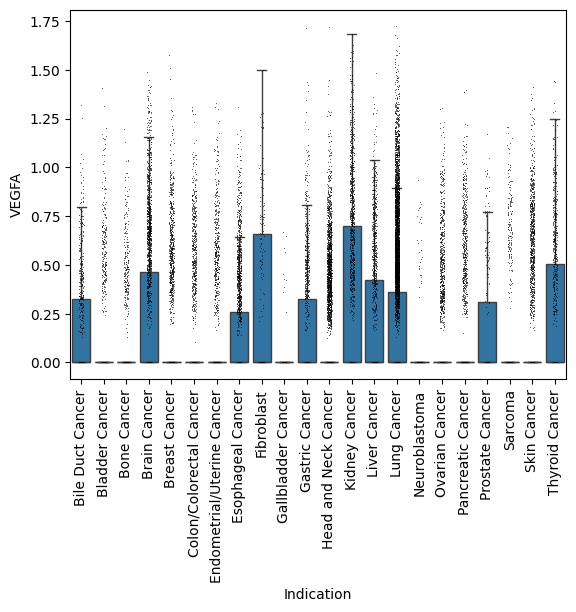

In [15]:
VisualiseData('VEGFA')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


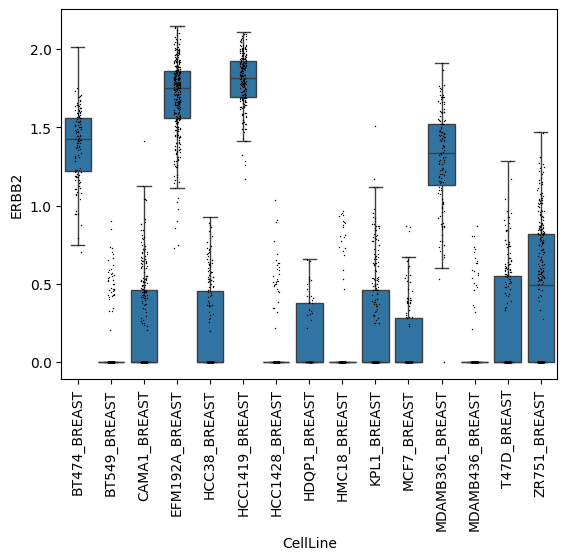

In [16]:
VisualiseData('ERBB2', 'Breast Cancer')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


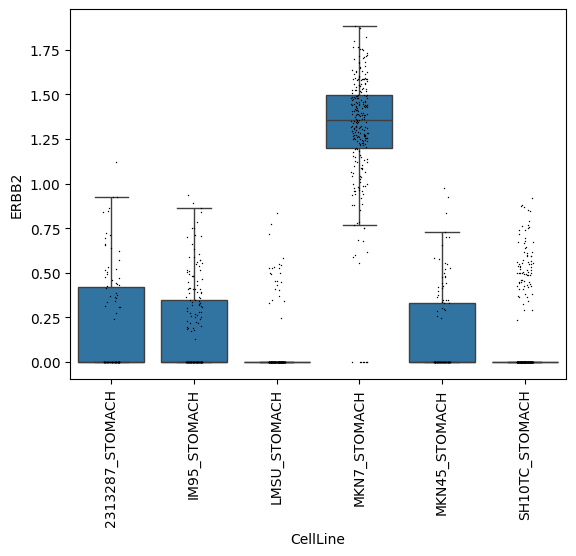

In [17]:
VisualiseData('ERBB2', 'Gastric Cancer')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


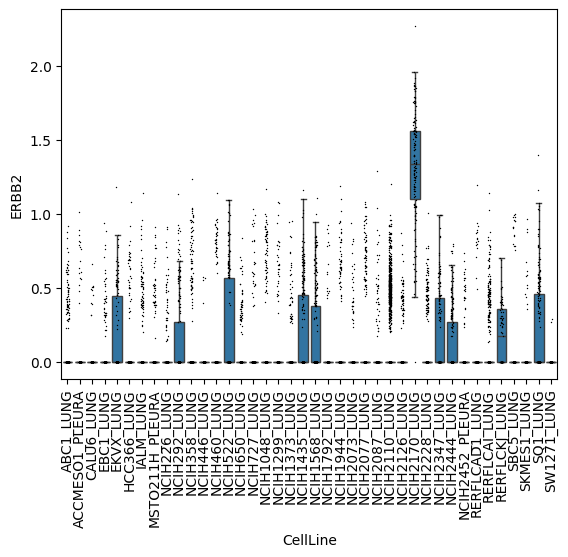

In [18]:
VisualiseData('ERBB2', 'Lung Cancer')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


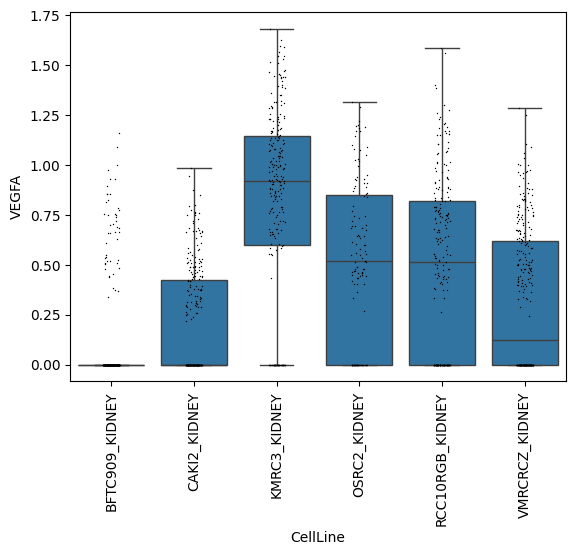

In [19]:
VisualiseData('VEGFA', 'Kidney Cancer')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


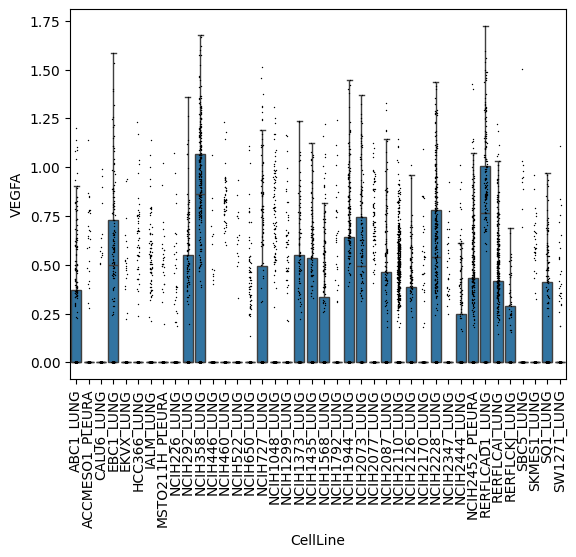

In [20]:
VisualiseData('VEGFA', 'Lung Cancer')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


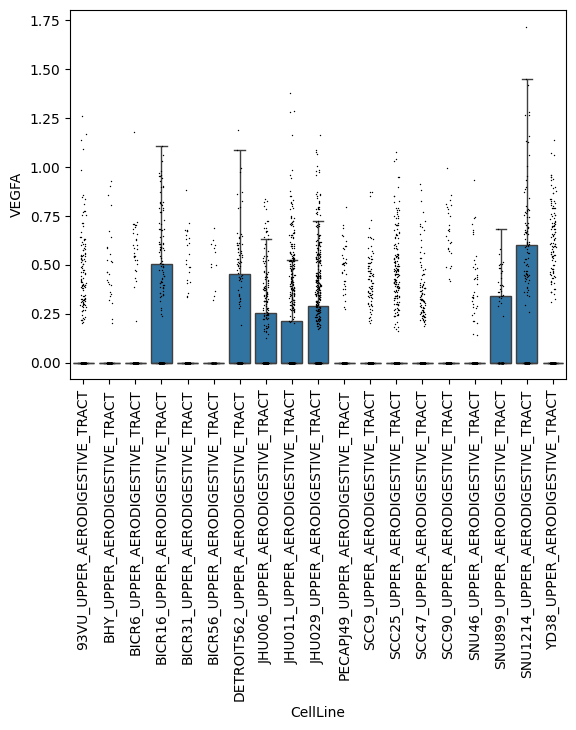

In [21]:
VisualiseData('VEGFA', 'Head and Neck Cancer')

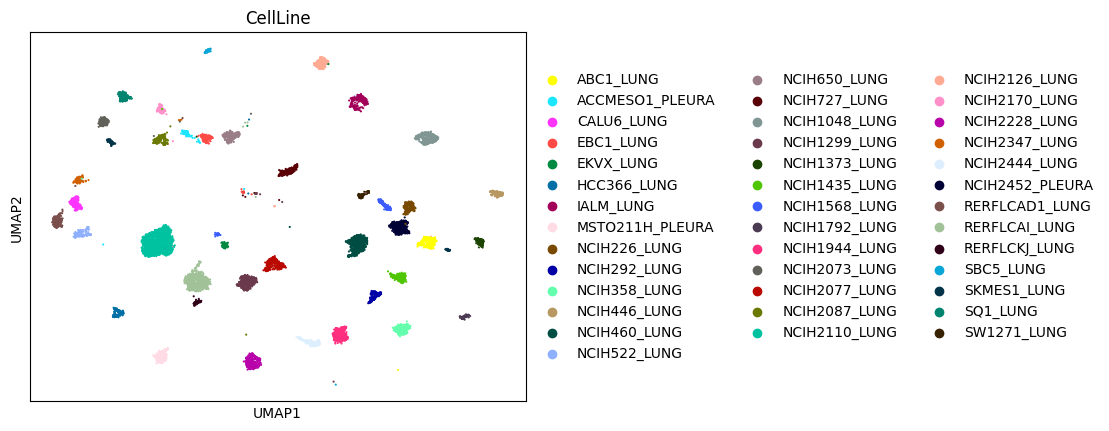

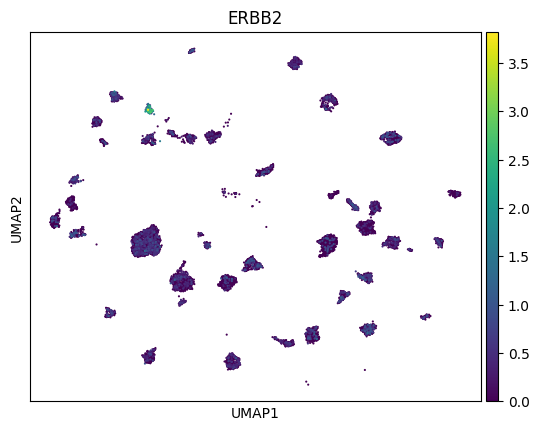

In [22]:
# Analysis for ERBB2

adata_lung = adata[adata.obs.Indication == 'Lung Cancer'].copy()
lung_df = sc.get.obs_df(adata_lung, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
lung_df['CellLine'] = adata_lung.obs['CellLine']

sc.pl.umap(adata_lung, color = ['CellLine'])
sc.pl.umap(adata_lung, color = ['ERBB2'])

In [23]:
sc.tl.rank_genes_groups(adata_lung, groupby = 'CellLine', use_raw = False)
diff_exp_df = sc.get.rank_genes_groups_df(adata_lung, group = None, key = 'rank_genes_groups')
diff_exp_df

/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,ABC1_LUNG,FKBP1A,92.572578,2.771659,2.194748e-256,4.152211e-254
1,ABC1_LUNG,TMEM230,58.206333,2.489812,1.076891e-178,1.094966e-176
2,ABC1_LUNG,PLA2G16,55.075935,2.912719,2.780724e-170,2.719572e-168
3,ABC1_LUNG,IGF2,51.793606,6.143083,1.873105e-156,1.577851e-154
4,ABC1_LUNG,SPINT2,47.814770,2.288530,9.598117e-161,8.455501e-159
...,...,...,...,...,...,...
923235,SW1271_LUNG,MGST1,-61.374516,-5.044789,1.602772e-116,1.345221e-114
923236,SW1271_LUNG,RP11-532F12.5,-66.164597,-27.668530,0.000000e+00,0.000000e+00
923237,SW1271_LUNG,CDKN2A,-66.336578,-5.273639,3.479288e-153,4.780086e-151
923238,SW1271_LUNG,PKIB,-69.635208,-28.503027,0.000000e+00,0.000000e+00


In [24]:
diff_exp_df[diff_exp_df['names']=='ERBB2']

,group,names,scores,logfoldchanges,pvals,pvals_adj
10984,ABC1_LUNG,ERBB2,-1.411779,-0.236180,1.589158e-01,2.190421e-01
36357,ACCMESO1_PLEURA,ERBB2,-2.229753,-0.651390,2.708762e-02,5.325916e-02
68222,CALU6_LUNG,ERBB2,-15.882333,-2.735072,3.507132e-44,6.394006e-43
81749,EBC1_LUNG,ERBB2,-1.594505,-0.347997,1.124209e-01,1.666637e-01
95102,EKVX_LUNG,ERBB2,2.373945,0.607075,1.887500e-02,4.087193e-02
125561,HCC366_LUNG,ERBB2,-0.644634,-0.154672,5.198649e-01,6.066230e-01
147671,IALM_LUNG,ERBB2,-1.451619,-0.261821,1.474972e-01,2.051081e-01
178078,MSTO211H_PLEURA,ERBB2,-4.384577,-0.816083,1.558634e-05,4.645511e-05
199609,NCIH226_LUNG,ERBB2,-3.936468,-0.788030,1.062821e-04,2.646845e-04
211071,NCIH292_LUNG,ERBB2,1.814507,0.411436,7.096028e-02,1.183321e-01


In [25]:
df_lung_target = lung_df[lung_df['CellLine'] == 'NCIH2170_LUNG'].copy()
df_lung_others = lung_df[lung_df['CellLine'] != 'NCIH2170_LUNG'].copy()

In [26]:
t_stat, p_value = ttest_ind(df_lung_target['ERBB2'], df_lung_others['ERBB2'], equal_var = False)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: 38.66725312879398, p-value: 2.551458288533391e-77


In [27]:
f_stat, p_value = f_oneway(df_lung_target['ERBB2'], df_lung_others['ERBB2'])
print(f'f-statistic: {f_stat}, p-value: {p_value}')

f-statistic: 4005.561594678734, p-value: 0.0


In [28]:
tukey_result = pairwise_tukeyhsd(endog = lung_df['ERBB2'], groups = lung_df['CellLine'], alpha = 0.05)
print(tukey_result)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
      ABC1_LUNG ACCMESO1_PLEURA  -0.0311    1.0 -0.1154  0.0533  False
      ABC1_LUNG      CALU6_LUNG  -0.0843 0.0051 -0.1576 -0.0109   True
      ABC1_LUNG       EBC1_LUNG  -0.0076    1.0 -0.0883  0.0731  False
      ABC1_LUNG       EKVX_LUNG   0.0688  0.464 -0.0185  0.1562  False
      ABC1_LUNG     HCC366_LUNG   0.0004    1.0 -0.0783  0.0791  False
      ABC1_LUNG       IALM_LUNG  -0.0042    1.0 -0.0734  0.0651  False
      ABC1_LUNG MSTO211H_PLEURA  -0.0343 0.9985  -0.105  0.0363  False
      ABC1_LUNG   NCIH1048_LUNG   0.0027    1.0 -0.0631  0.0685  False
      ABC1_LUNG   NCIH1299_LUNG  -0.0646 0.0285 -0.1267 -0.0025   True
      ABC1_LUNG   NCIH1373_LUNG   0.0141    1.0   -0.07  0.0981  False
      ABC1_LUNG   NCIH1435_LUNG   0.0825 0.0064  0.0098  0.1551   True
      

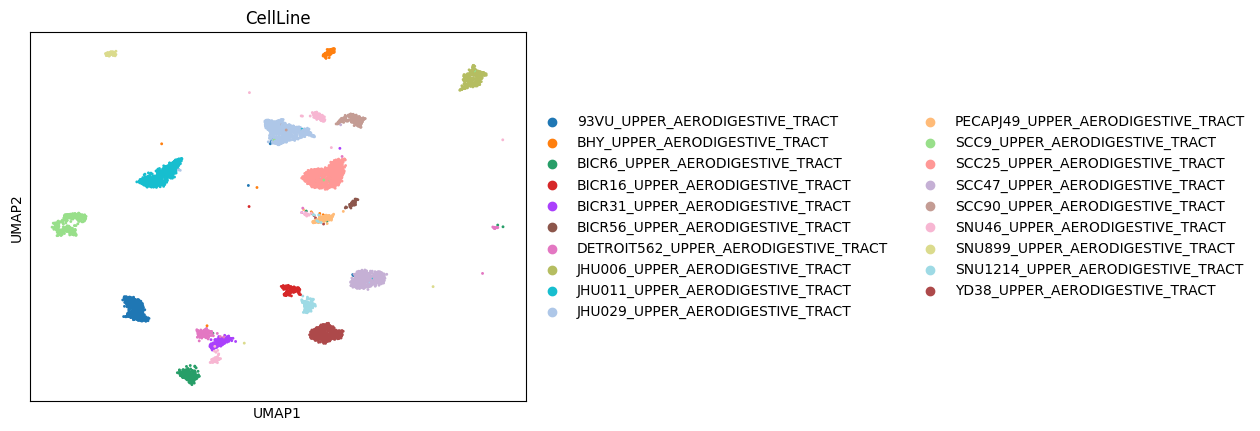

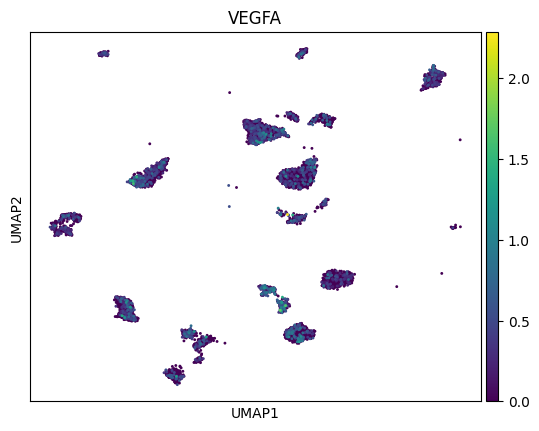

In [37]:
# Analysis for VEGFA

adata_hnscc = adata[adata.obs.Indication == 'Head and Neck Cancer'].copy()
hnscc_df = sc.get.obs_df(adata_hnscc, keys = ['ERBB2', 'VEGFA', 'VEGFB'], layer = 'log2_counts')
hnscc_df['CellLine'] = adata_hnscc.obs['CellLine']

sc.pl.umap(adata_hnscc, color = ['CellLine'])
sc.pl.umap(adata_hnscc, color = ['VEGFA'])

In [35]:
sc.tl.rank_genes_groups(adata_hnscc, groupby = 'CellLine', use_raw = False)
diff_exp_df_ = sc.get.rank_genes_groups_df(adata_hnscc, group = None, key = 'rank_genes_groups')
diff_exp_df_

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,93VU_UPPER_AERODIGESTIVE_TRACT,MTRNR2L1,138.729538,5.319213,0.0,0.0
1,93VU_UPPER_AERODIGESTIVE_TRACT,UCHL1,99.187233,4.168889,0.0,0.0
2,93VU_UPPER_AERODIGESTIVE_TRACT,CDKN2A,95.886803,3.317295,0.0,0.0
3,93VU_UPPER_AERODIGESTIVE_TRACT,MRPL21,77.999779,2.262848,0.0,0.0
4,93VU_UPPER_AERODIGESTIVE_TRACT,MGST1,76.569557,2.595061,0.0,0.0
...,...,...,...,...,...,...
438534,YD38_UPPER_AERODIGESTIVE_TRACT,PSMA2,-97.339218,-30.161770,0.0,0.0
438535,YD38_UPPER_AERODIGESTIVE_TRACT,NDUFB8,-106.350906,-30.326807,0.0,0.0
438536,YD38_UPPER_AERODIGESTIVE_TRACT,UBB,-111.364326,-4.508278,0.0,0.0
438537,YD38_UPPER_AERODIGESTIVE_TRACT,UQCR11,-111.592247,-30.673878,0.0,0.0


In [36]:
diff_exp_df_[diff_exp_df_['names']=='VEGFA']

,group,names,scores,logfoldchanges,pvals,pvals_adj
13125,93VU_UPPER_AERODIGESTIVE_TRACT,VEGFA,-1.323988,-0.191119,1.859464e-01,2.657150e-01
33728,BHY_UPPER_AERODIGESTIVE_TRACT,VEGFA,-1.119502,-0.308058,2.646980e-01,3.681306e-01
64362,BICR6_UPPER_AERODIGESTIVE_TRACT,VEGFA,-4.190340,-0.876969,3.598337e-05,1.184275e-04
70438,BICR16_UPPER_AERODIGESTIVE_TRACT,VEGFA,6.467262,1.416344,6.521824e-10,3.722310e-09
112580,BICR31_UPPER_AERODIGESTIVE_TRACT,VEGFA,-5.599562,-1.184061,5.037920e-08,2.845124e-07
127413,BICR56_UPPER_AERODIGESTIVE_TRACT,VEGFA,-1.740328,-0.597293,8.550174e-02,1.525561e-01
139997,DETROIT562_UPPER_AERODIGESTIVE_TRACT,VEGFA,4.236792,1.036723,3.744482e-05,1.283247e-04
166774,JHU006_UPPER_AERODIGESTIVE_TRACT,VEGFA,1.327561,0.205133,1.851479e-01,2.823334e-01
187896,JHU011_UPPER_AERODIGESTIVE_TRACT,VEGFA,1.789140,0.230756,7.394222e-02,1.113285e-01
210827,JHU029_UPPER_AERODIGESTIVE_TRACT,VEGFA,4.142986,0.472006,3.720181e-05,1.063218e-04


In [38]:
df_hnscc_target_one = hnscc_df[hnscc_df['CellLine'] == 'SNU1214_UPPER_AERODIGESTIVE_TRACT'].copy()
df_hnscc_others_one = hnscc_df[hnscc_df['CellLine'] != 'SNU1214_UPPER_AERODIGESTIVE_TRACT'].copy()

In [39]:
t_stat_, p_value_ = ttest_ind(df_hnscc_target_one['VEGFA'], df_hnscc_others_one['VEGFA'], equal_var = False)
print(f't-statistic: {t_stat_}, p-value: {p_value_}')

t-statistic: 7.257565460715087, p-value: 9.732026231693352e-12


In [40]:
f_stat_, p_value_ = f_oneway(df_hnscc_target_one['VEGFA'], df_hnscc_others_one['VEGFA'])
print(f'f-statistic: {f_stat_}, p-value: {p_value_}')

f-statistic: 148.4034830848608, p-value: 8.405728969806294e-34


In [41]:
tukey_result = pairwise_tukeyhsd(endog = hnscc_df['VEGFA'], groups = hnscc_df['CellLine'], alpha = 0.05)
print(tukey_result)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------
      93VU_UPPER_AERODIGESTIVE_TRACT        BHY_UPPER_AERODIGESTIVE_TRACT  -0.0079    1.0 -0.0812  0.0655  False
      93VU_UPPER_AERODIGESTIVE_TRACT     BICR16_UPPER_AERODIGESTIVE_TRACT   0.1575    0.0   0.094  0.2209   True
      93VU_UPPER_AERODIGESTIVE_TRACT     BICR31_UPPER_AERODIGESTIVE_TRACT  -0.0477 0.3367 -0.1076  0.0123  False
      93VU_UPPER_AERODIGESTIVE_TRACT     BICR56_UPPER_AERODIGESTIVE_TRACT  -0.0226    1.0 -0.1162  0.0711  False
      93VU_UPPER_AERODIGESTIVE_TRACT      BICR6_UPPER_AERODIGESTIVE_TRACT   -0.037 0.7242 -0.0942  0.0201  False
      93VU_UPPER_AERODIGESTIVE_TRACT DETROIT562_UPPER_AERODIGESTIVE_TRACT   0.1117    0.0  0.041

In [44]:
df_hnscc_target_two = hnscc_df[hnscc_df['CellLine'] == 'SCC47_UPPER_AERODIGESTIVE_TRACT'].copy()
df_hnscc_others_two = hnscc_df[hnscc_df['CellLine'] != 'SCC47_UPPER_AERODIGESTIVE_TRACT'].copy()

In [45]:
t_stat__, p_value__ = ttest_ind(df_hnscc_target_two['VEGFA'], df_hnscc_others_two['VEGFA'], equal_var = False)
print(f't-statistic: {t_stat__}, p-value: {p_value__}')

t-statistic: -8.12978787965765, p-value: 1.475578100728705e-15


In [46]:
f_stat__, p_value__ = f_oneway(df_hnscc_target_two['VEGFA'], df_hnscc_others_two['VEGFA'])
print(f'f-statistic: {f_stat__}, p-value: {p_value__}')

f-statistic: 32.69481930676174, p-value: 1.1220137923608294e-08


In [47]:
tukey_result__ = pairwise_tukeyhsd(endog = hnscc_df['VEGFA'], groups = hnscc_df['CellLine'], alpha = 0.05)
print(tukey_result__)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                               group2                meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------
      93VU_UPPER_AERODIGESTIVE_TRACT        BHY_UPPER_AERODIGESTIVE_TRACT  -0.0079    1.0 -0.0812  0.0655  False
      93VU_UPPER_AERODIGESTIVE_TRACT     BICR16_UPPER_AERODIGESTIVE_TRACT   0.1575    0.0   0.094  0.2209   True
      93VU_UPPER_AERODIGESTIVE_TRACT     BICR31_UPPER_AERODIGESTIVE_TRACT  -0.0477 0.3367 -0.1076  0.0123  False
      93VU_UPPER_AERODIGESTIVE_TRACT     BICR56_UPPER_AERODIGESTIVE_TRACT  -0.0226    1.0 -0.1162  0.0711  False
      93VU_UPPER_AERODIGESTIVE_TRACT      BICR6_UPPER_AERODIGESTIVE_TRACT   -0.037 0.7242 -0.0942  0.0201  False
      93VU_UPPER_AERODIGESTIVE_TRACT DETROIT562_UPPER_AERODIGESTIVE_TRACT   0.1117    0.0  0.041